In [1]:
# imports
from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd

In [8]:
1 ##
####### GET SEQUENCES FUNCTION ########
## Dr. X: this gets sequences 
## Please properly document this function in the Jupyter notebook 
## Your descriptions of all functions should contain information about what the function does,
## as well as information about the return types and arguments.
def get_sequences_from_file(fasta_fn):
    sequence_data_dict = {}
    for record in SeqIO.parse(fasta_fn, "fasta"):
        description = record.description.split()
        species_name = description[1] + " " + description[2]
        sequence_data_dict[species_name] = record.seq
    return(sequence_data_dict)

In [23]:
def get_sequences_from_file(fasta_fn): # it will extract sequences from input file
    sequence_data_dict = {}# initialize an empty dictionar to store sequences with the headers
    for record in SeqIO.parse(fasta_fn, "fasta"):# takes every entry in the fasta file
        description = record.description.split() # the contenets of each header are split
        species_name = description[1] + " " + description[2] # the first and second index of the header denotes the genus and species 
        sequence_data_dict[species_name] = record.seq # the sepecies name is stored to a dictionary
    return(sequence_data_dict) # returns the dictionary as ouput

In [ ]:
2 ##
####### YOUR STRING-TRANSLATE FUNCTION ########
## Write a function that translates sequences
## All sequences start at codon position 1
## Complete a function that translates using a loop over the string of nucleotides
## Here is  some pseudo-code and suggestions
## feel free to change the function and variable names
# def translate_function(string_nucleotides): 
#     mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] # this should work using BioPython (be sure to check what this returns)
#     for-loop through every 3rd position in string_nucleotides to get the codon using range subsets
#         # IMPORTANT: if the sequence has a stop codon at the end, you should leave it off
#         # this is how you can retrieve the amino acid: mito_table.forward_table[codon]
#         add the aa to aa_seq_string
#     return(aa_seq_string)

In [2]:
def translate_function(string_nucleotides): 
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] # etract codon table
    aa_seq_string = ''  # initialize an empty string to store amino acids
    # for-loop through every 3rd position in string_nucleotides to get the codon
    for position in range(0, len(string_nucleotides) - 2, 3):
        codon = string_nucleotides[position:position+3]
        if codon in mito_table.stop_codons:
            break  # Stop translation at the first stop codon
        aa = mito_table.forward_table.get(codon, 'X')  # retrieve an AA, 'X' if unknown
        aa_seq_string += aa
    return aa_seq_string


In [ ]:
#3 Alternative Function

In [9]:
# we shall use the in-built biopython translate function from codon to aa
def faster_translate(string_nucleotides):
    data=[]
    for species, seq in sequence_data_dict.items():
        my_seq = Seq(str(seq))
        translated = my_seq.translate() # convert Seq object to string translate
        data.append({"species":species, "protein_sequence":translated})
    return aa_seq_string

In [ ]:
#4 AA analysis function

In [10]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis
def compute_molecular_weight(aa_seq):
    aa_seq=str(aa_seq) # ProtParam function may require aa_seq to be a string
    aa_seq=aa_seq.replace('*', '') # to remove stop codon if any
    weight=ProteinAnalysis(aa_seq).molecular_weight()
    return weight

In [ ]:
#5 code for GC content analysis function

In [13]:
from Bio.SeqUtils import gc_fraction

In [19]:
def gc_content(seq):
    return gc_fraction(str(seq))*100

In [24]:
#Main function
cytb_seqs=get_sequences_from_file("penguins_cytb.fasta")
penguins_df = pd.read_csv("penguins_mass.csv") # includes only data for body mass
species_list = list(penguins_df.species)

In [ ]:
#6 adding two columns of molcular weight and GC content

In [25]:
import numpy as np
penguins_df["molecular_weight"] = np.nan
penguins_df["gc_content"] = np.nan

In [26]:
sequence_dict=dict(cytb_seqs)

In [ ]:
#7

In [39]:
for species_name, nucleotide_seq in cytb_seqs.items():
    aa_seq = translate_function(nucleotide_seq)
    mol_weight = compute_molecular_weight(aa_seq)
    gc = gc_content(nucleotide_seq)
    penguins_df.loc[penguins_df["species"] == species_name, "molecular_weight"] = mol_weight
    penguins_df.loc[penguins_df["species"] == species_name, "gc_content"] = gc
    

In [40]:
penguins_df.head()

,species,mass,molecular_weight,gc_content
0,Aptenodytes forsteri,28.00,42459.6021,48.381452
1,Aptenodytes patagonicus,13.40,42563.7067,49.693788
2,Eudyptes chrysocome,2.80,42475.5753,51.181102
3,Eudyptes chrysolophus,4.50,42445.5493,50.918635
4,Eudyptes sclateri,4.25,42475.5753,50.831146


In [ ]:
#8 bar chart 

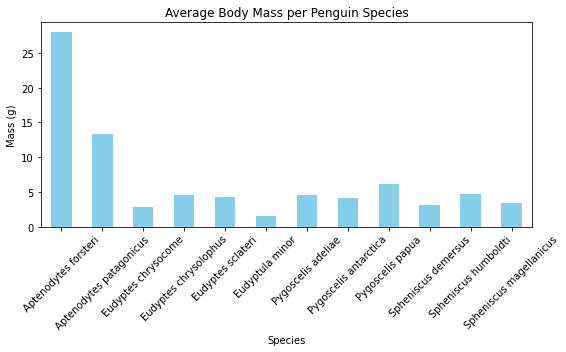

In [34]:
# Install matplotlib if not already installed
!pip install matplotlib --quiet

# Import matplotlib
import matplotlib.pyplot as plt

# Optional: Set figure size
plt.figure(figsize=(8, 5))

# Group by species and calculate mean mass
mass_by_species = penguins_df.groupby("species")["mass"].mean()

# Plot bar chart
mass_by_species.plot(kind='bar', color='skyblue')
plt.title("Average Body Mass per Penguin Species")
plt.xlabel("Species")
plt.ylabel("Mass (g)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#8 smallest species and geographical range

In [35]:
min_mass_species = mass_by_species.idxmin()
min_mass_value = mass_by_species.min()
print(f"Smallest penguin species: {min_mass_species} ({min_mass_value:.2f} g)")

Smallest penguin species: Eudyptula minor (1.60 g)


In [36]:
gc_value = penguins_df[penguins_df["species"] == min_mass_species]["gc_content"].mean()
print(f"Geographical range of smallest species: ({min_mass_species}): {gc_value:.2f}%")

Geographical range of smallest species: (Eudyptula minor): 49.26%


In [ ]:
#9 visualization of molecular weight vs GC content 

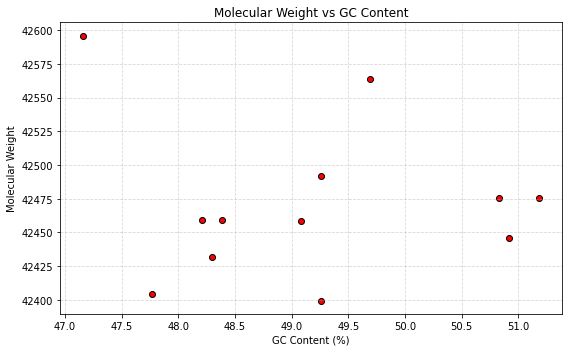

In [37]:
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(penguins_df['gc_content'], penguins_df['molecular_weight'], color='red', edgecolor='k')
plt.xlabel('GC Content (%)')
plt.ylabel('Molecular Weight')
plt.title('Molecular Weight vs GC Content')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
#10 new data frame

In [41]:
penguins_df.to_csv('penguins_mass_cytb.csv', index=False)